# 1 - Perkenalan

Saya Novanska Aginta Ganesha dari batch RMT - 019

Dataset diambil dari Kaggle dengan judul dataset 'Stroke Prediction Dataset'

Link dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Objective :

Membuat model classification untuk memprediksi stroke pada dataset.

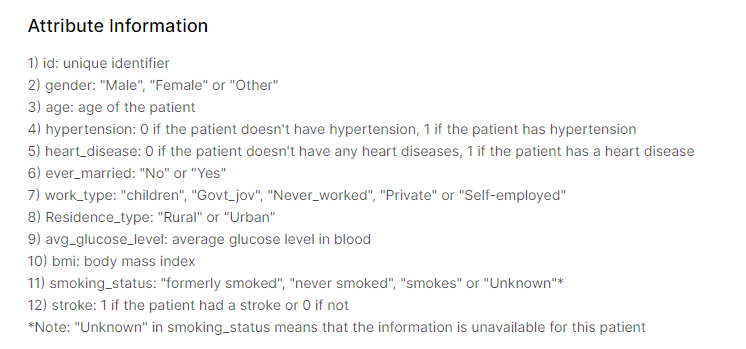

# 2 - Import Libraries

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from tqdm import tqdm
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#data balancing
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#import classification evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model saving
import json
import joblib
import pickle

import warnings
warnings.filterwarnings("ignore")

# 3 - Data Loading

In [3]:
#load data
df = pd.read_csv('D:\Hacktiv8\p1-ftds019-rmt-m2-Novanska\healthcare-dataset-stroke-data.csv')

In [4]:
#check 10 data awal
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
#check 10 data akhir
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
#check unique values pada target
df['stroke'].unique()

array([1, 0], dtype=int64)

In [7]:
#check apakah ada data terduplikasi
df.duplicated().sum()

0

In [8]:
#check jumlah unique values pada data
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Gender memiliki 3 unique values, nantinya akan di check gender apa selain male dan female.

In [9]:
data = df.copy()

# 4 - Exploratory Data Analysis (EDA)

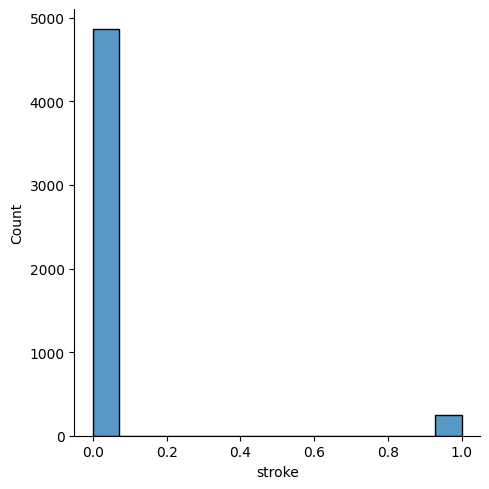

In [10]:
sns.displot(x = data['stroke'])

In [11]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Insight :

ada 4861 pasien yang tidak terkena stroke, dan 249 pasien yang terkena stroke. data tergolong unbalanced karena terlalu bias kepada yang tidak terkena stroke.

<Axes: xlabel='gender', ylabel='count'>

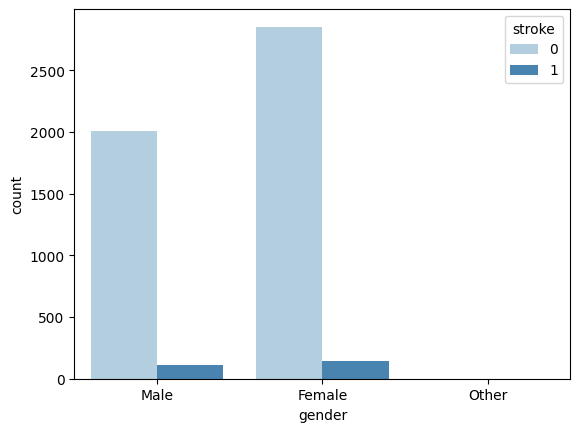

In [12]:
sns.countplot(x="gender", hue="stroke", data=data, palette="Blues")

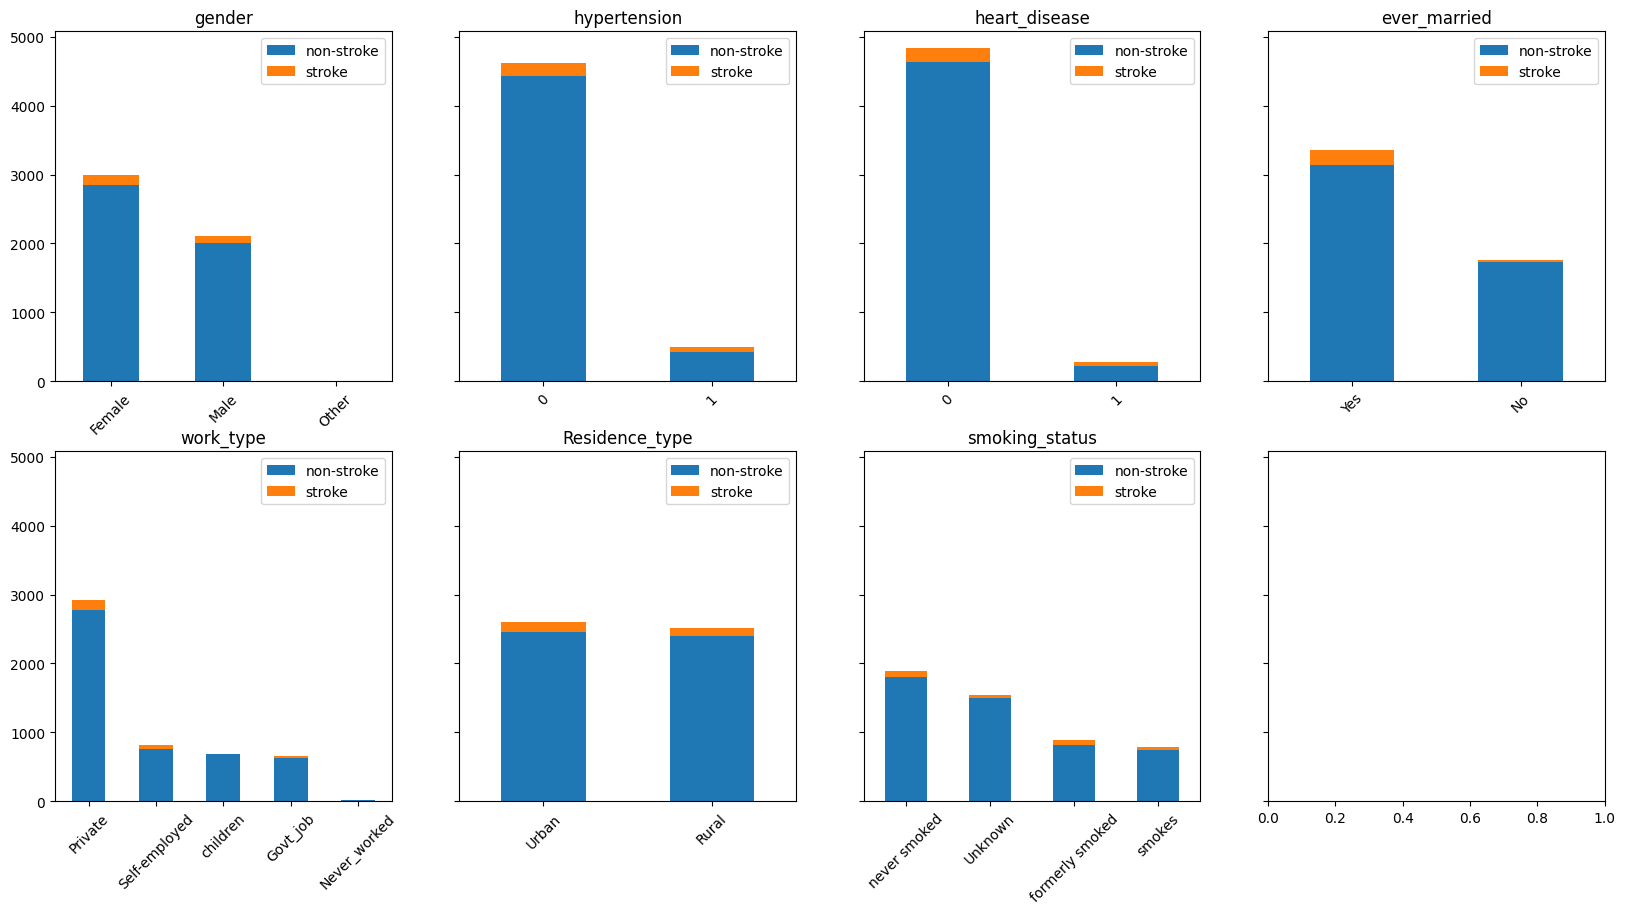

In [13]:
#plot kolom categorical terhadap target
cat_col = ['gender' , 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type' ,'smoking_status' ]
fig , axs = plt.subplots(nrows=2 , ncols=4 , figsize=(20,10) , sharey=True)
axs = axs.ravel()

for index , col in enumerate(cat_col) :
    df_stroke_0 = pd.DataFrame(df[df['stroke'] == 0][col].value_counts()).rename(columns={col : 'non-stroke'})
    df_stroke_1 = pd.DataFrame(df[df['stroke'] == 1][col].value_counts()).rename(columns={col : 'stroke'})
    
    df_final = df_stroke_0.copy()
    df_final['stroke'] = df_stroke_1['stroke']
    df_final.plot(kind='bar' , stacked=True , ax=axs[index])
    
    axs[index].set_title(col)
    axs[index].tick_params('x' ,labelrotation=45)


Insight :

dapat dilihat bahwa kebanyakan pasien yang tidak memiliki status hypertension, heart_disease, dan smoking_status sangat sedikit mendapatkan stroke.


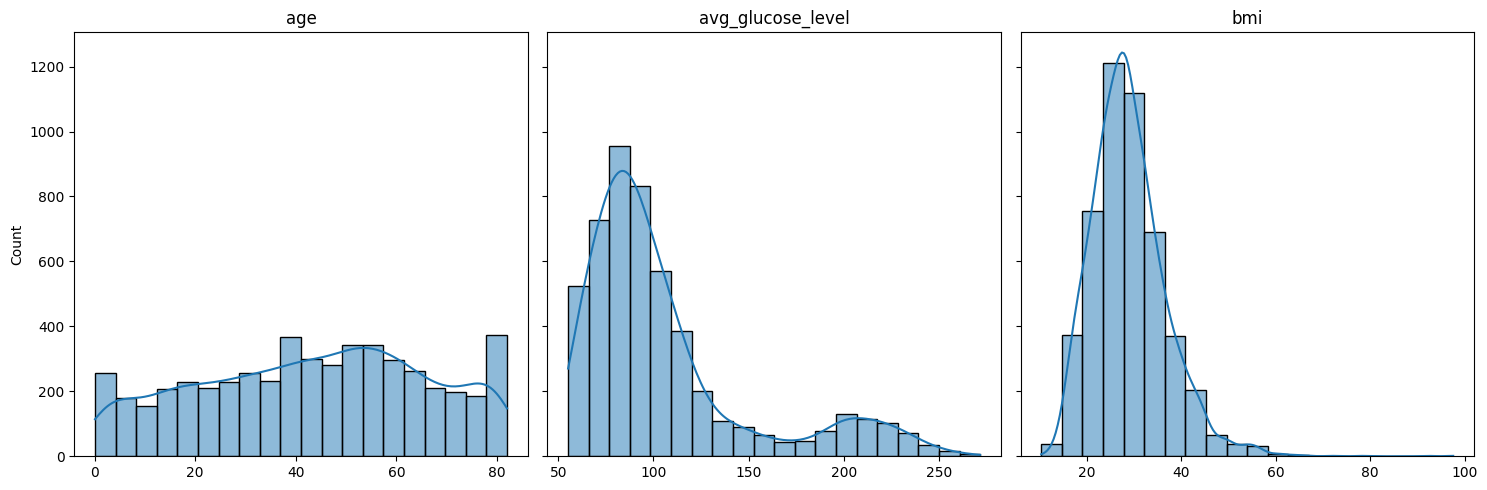

In [14]:
#melihat distribusi pada setiap kolom numerical
num_col = ['age','avg_glucose_level','bmi']

fig , axs = plt.subplots(nrows=1 , ncols=3 , figsize=(15,5) , sharey=True)
axs = axs.ravel()

for index , col in enumerate(num_col) : 
    sns.histplot(data=df , x=col ,bins=20 ,kde=True, ax=axs[index])
    axs[index].set_title(col)
    axs[index].set_xlabel('')
plt.tight_layout()

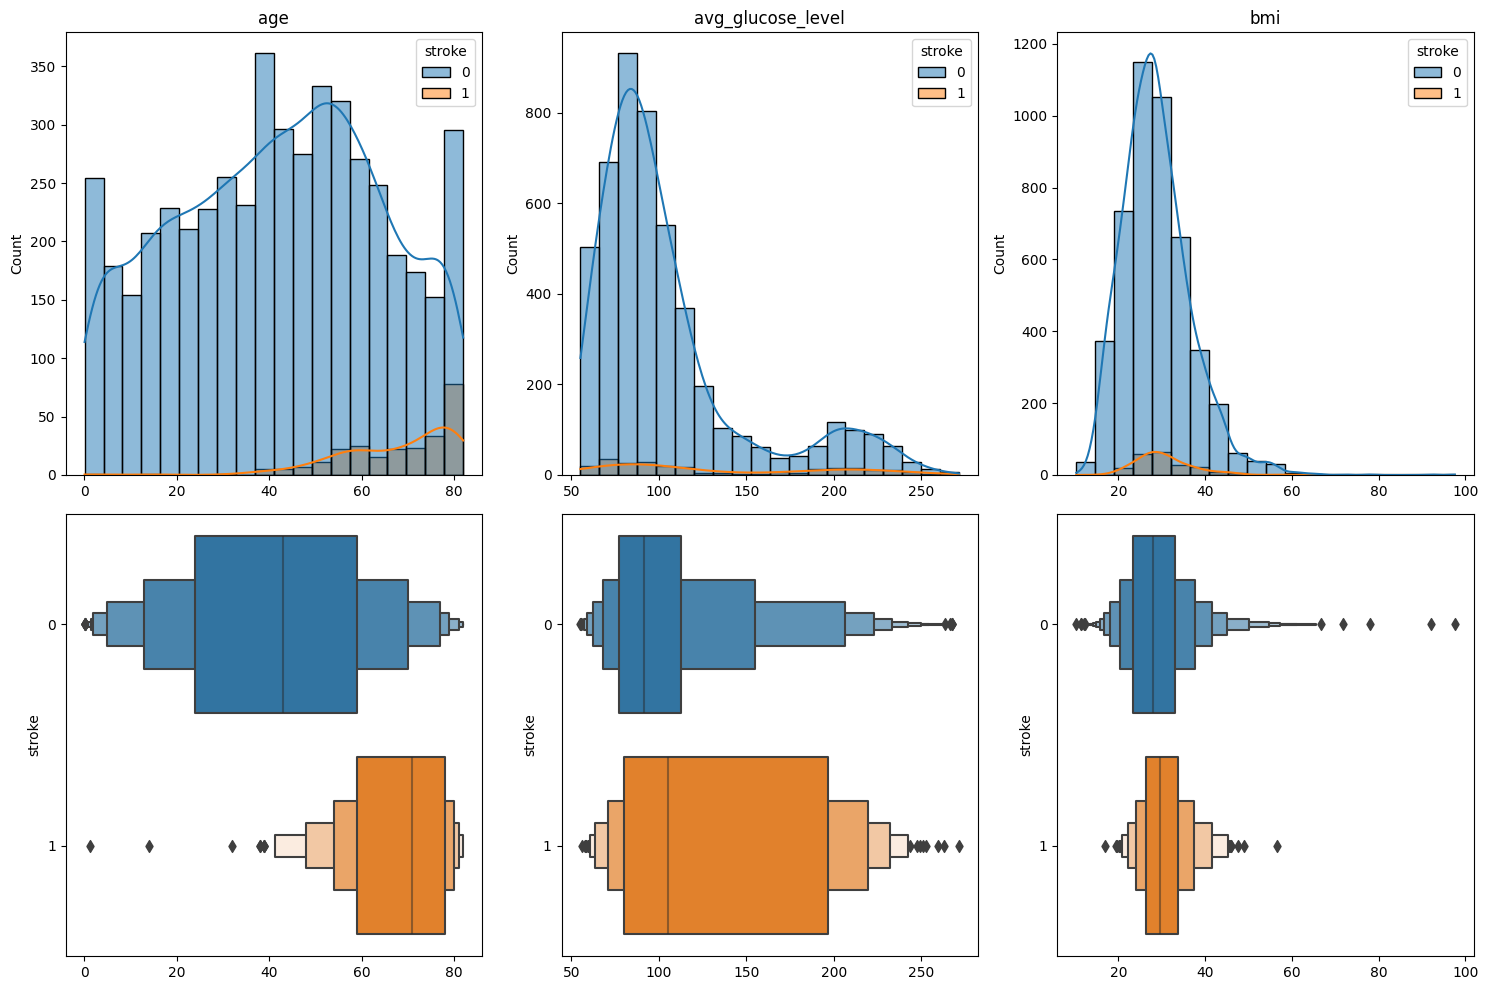

In [15]:
# lihat distribusi terhadap feature ke target(stroke)

fig , axs = plt.subplots(nrows=2 , ncols=3 , figsize=(15,10) )
axs = axs.ravel()

for index , col in enumerate(num_col) : 
    sns.histplot(data=df , x=col ,bins=20 ,kde=True , hue='stroke', ax=axs[index])
    sns.boxenplot(data=df , x=col, y='stroke' ,orient='h', ax=axs[index+3])
    axs[index].set_xlabel('')
    axs[index+3].set_xlabel('')
    axs[index].set_title(col if index in [0,1,2] else '')

plt.tight_layout()

Insight :

terlihat bahwa banyaknya pasien yang terkena stroke itu berada di rentang 40-80 tahun dengan avg_glucose_level di 50-120

In [16]:
def boxplot_cat(col_num) :
    
    fig , ax = plt.subplots(nrows=1 , ncols=len(cat_col) , figsize=(20,5) , sharey=True )
    ax = ax.ravel()

    for index , col  in enumerate(cat_col) : 
        sns.boxplot(data=data , y=col_num, x=col  , ax=ax[index])
        ax[index].tick_params('x' ,labelrotation=90)
        ax[index].set_title(col)
        ax[index].set_xlabel('')
        ax[index].set_ylabel(col_num if index==0 else '')

    return plt.tight_layout()

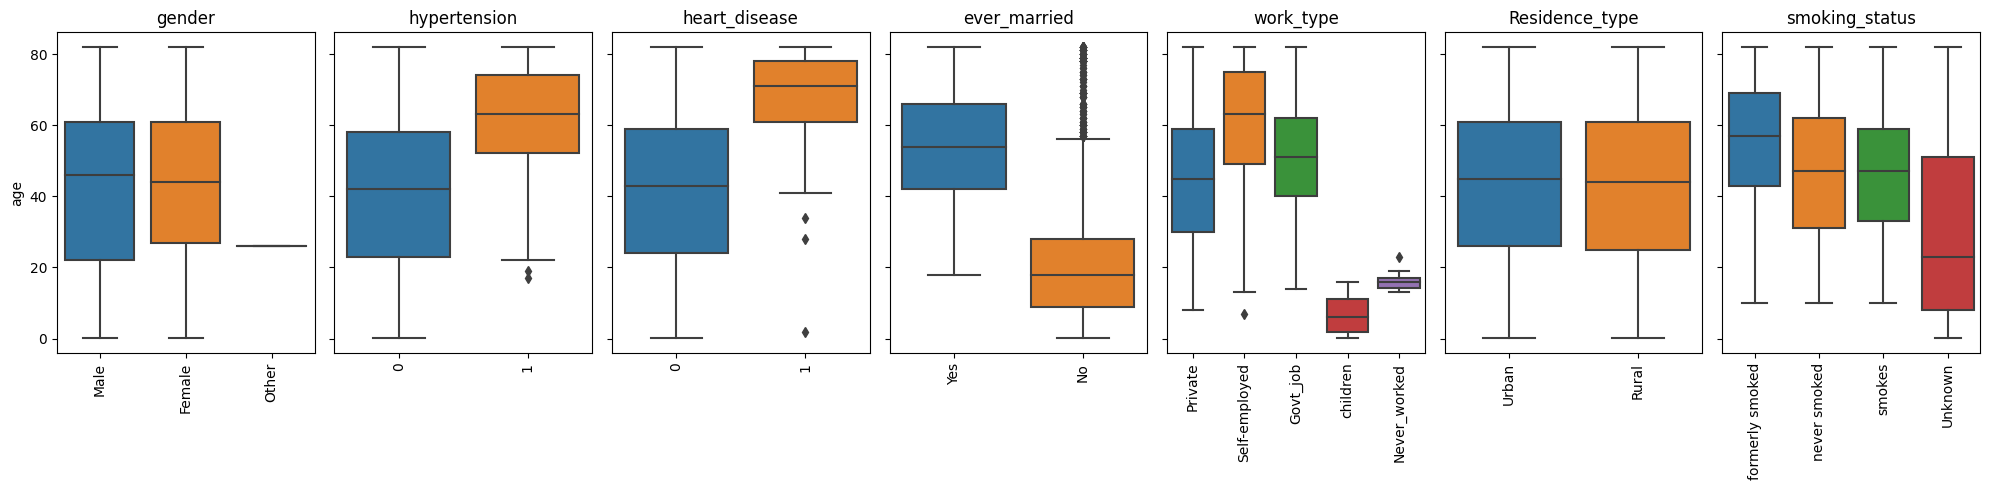

In [17]:
boxplot_cat('age')

Insight :

1. terlihat bahwa laki-laki memiliki rentang 20-60 tahun 
2. kebanyakan yang tidak memiliki hipertensi berumur diantara 20-60 tahun
3. kebanyakan yang tidak memiliki penyakit jantung berumur diantara 20-60 tahun
4. kebanyakan yang tidak pernah menikah itu di rentang umur 0-25 tahun, dengan pekerjaan sebagai anak-anak atau tidak pernah bekerja.
5. Nilai residence rata-rata sama maupun urban atau rural.
6. Rata-rata yang berumur 0-20 tahun tidak diketahui pernah merokok atau tidak.

## Statistika Deskriptif

In [346]:
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000,5109.000000
mean,36513.985516,0.413975,43.229986,0.097475,0.054022,0.656293,2.167743,0.508123,106.140399,28.89456,1.376982,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,1.090398,0.499983,45.285004,7.85432,1.071626,0.215340
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.30000,0.000000,0.000000
25%,17740.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.240000,23.50000,0.000000,0.000000
50%,36922.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.880000,28.10000,2.000000,0.000000
75%,54643.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.10000,2.000000,0.000000
max,72940.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.60000,3.000000,1.000000


#  5 - Feature Engineering

## Handling Missing Values

In [388]:
#copy data asli menjadi.
data = df.copy()

In [389]:
#check missing data
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

dari data describe kita bisa tau bahwa mean > median maka akan diisi missing values pada BMi dengan mean.

In [390]:
#penggantian missing values dengan nilai tengah
data['bmi'].fillna(data['bmi'].mean() , inplace=True)

In [391]:
#check missing values pada data
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Handling Cardinallity

In [392]:
#check gender "Other" value counts.
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [393]:
#drop data gender "other"
data.drop(data[data['gender']=='Other'].index,inplace=True)

In [394]:
#check jumlah unique data
data.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [395]:
#check data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [396]:
#check info type data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [397]:
#drop kolom id karena itu hanya unique identifier.
data = data.drop('id', axis=1)

## Feature Encoding

In [398]:
#encoding menggunakan label encoder.
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    data[i] = le.fit_transform(data[i])
    l3.append(list(data[i].unique())); l4.append(list(le.inverse_transform(data[i].unique())))
    print(i,' : ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))

Label Encoder Transformation


100%|██████████| 5/5 [00:00<00:00, 333.53it/s]

gender  :  [1 0]  =  ['Male' 'Female']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [399]:
#check data
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [400]:
#isi data NaN dengan mean
imp = SimpleImputer(missing_values = np.NaN,strategy='mean')
imp = imp.fit(data)
data = imp.transform(data)

In [401]:
#memasukkan nama cols.
cols = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']

In [402]:
#pembuatan dataframe
data = pd.DataFrame(data,columns = cols)

In [403]:
#check data setelah mengisi data NaN
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,36.600000,1.0,1.0
1,0.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,28.893237,2.0,1.0
2,1.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,32.500000,2.0,1.0
3,0.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,34.400000,3.0,1.0
4,0.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,24.000000,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,80.0,1.0,0.0,1.0,2.0,1.0,83.75,28.893237,2.0,0.0
5105,0.0,81.0,0.0,0.0,1.0,3.0,1.0,125.20,40.000000,2.0,0.0
5106,0.0,35.0,0.0,0.0,1.0,3.0,0.0,82.99,30.600000,2.0,0.0
5107,1.0,51.0,0.0,0.0,1.0,2.0,0.0,166.29,25.600000,1.0,0.0


## Check correlation

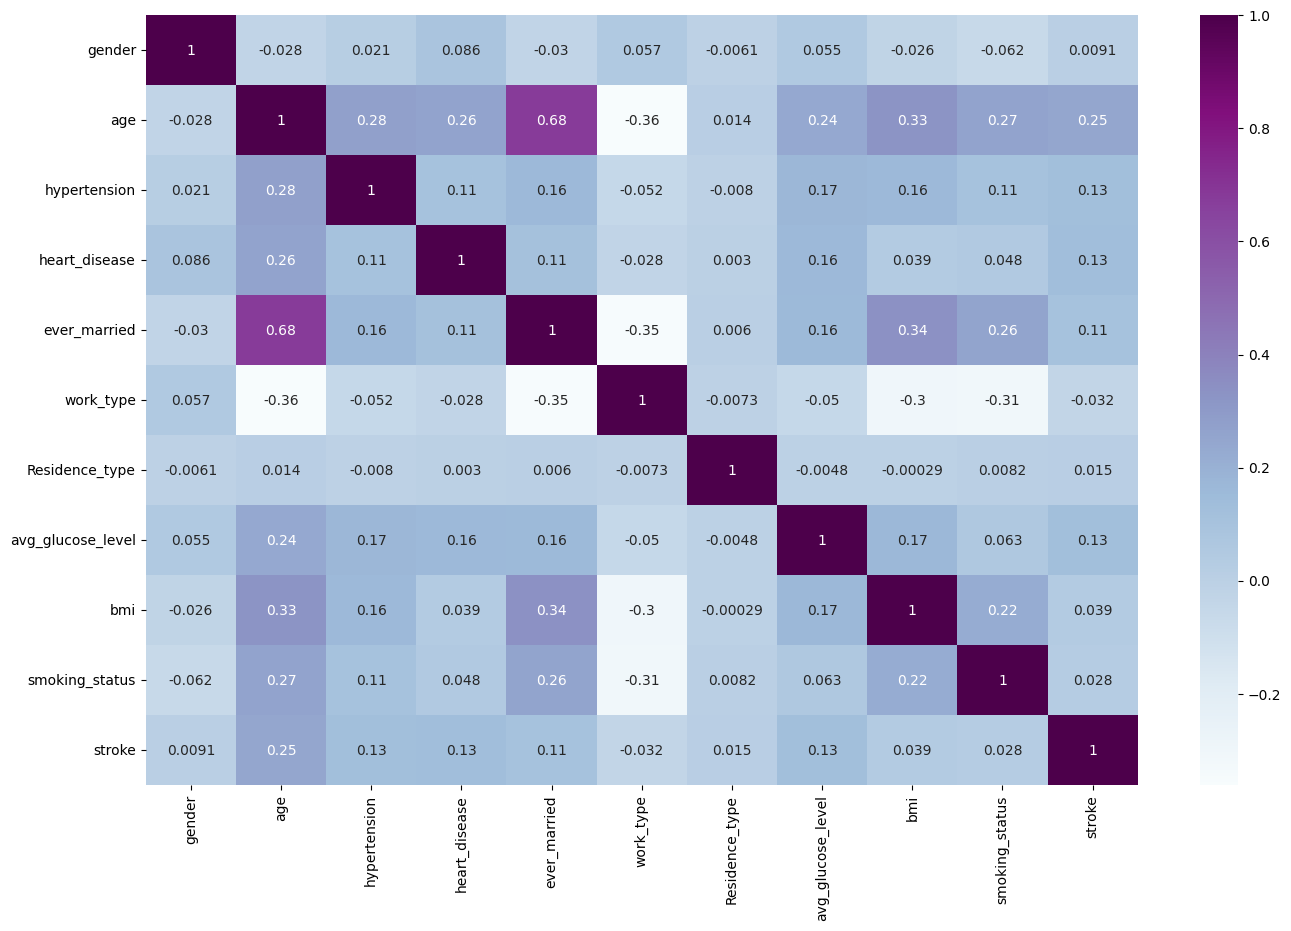

In [404]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),annot = True,cmap='BuPu')
plt.show()

Insight :

age dan ever_married memiliki tingkat korelasi yang tinggi

## Data Balancing With SMOTE

In [406]:
#data balancing with smote.
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = data.loc[:,:'smoking_status']
t1 = data.loc[:,'stroke']
#pipeline digunakan untuk steps.
steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0.0: 2490, 1.0: 2490})

Insight :

data sudah balanced pada data stroke (tidak bisa kembali)

# Model Definition

pada permodelan kali ini akan digunakan model klasifikasi Logistic,SVM,RandomForest dan Kneighbor dan akan dilihat model mana yang terbaik diantara 4 model tersebut lalu dilanjutkan dengan melakukan RandomSearch untuk melihat apakah model tersebut lebih baik atau sebaliknya.

# Model Training & Model Evaluation

In [407]:
#split train-test 
X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2, random_state=47)

In [410]:
#check balance pada y_test (sudah balance karena dilakukan smote)
y_test.value_counts()

1.0    505
0.0    491
Name: stroke, dtype: int64

In [412]:
score = {}
pipe1 = make_pipeline(StandardScaler(),LogisticRegression())
pipe1.fit(X_train,y_train)
score['logistic_Regression'] = pipe1.score(X_test,y_test)

In [413]:
pipe2 = make_pipeline(StandardScaler(),KNeighborsClassifier())
pipe2.fit(X_train,y_train)
score['KNN'] = pipe2.score(X_test,y_test)

In [414]:
pipe3 = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe3.fit(X_train,y_train)
score['RandomForest'] = pipe3.score(X_test,y_test)

In [415]:
pipe4 = make_pipeline(StandardScaler(),SVC())
pipe4.fit(X_train,y_train)
score['SVM'] = pipe4.score(X_test,y_test)

In [416]:
#check score setiap model.
score

{'logistic_Regression': 0.7590361445783133,
 'KNN': 0.8765060240963856,
 'RandomForest': 0.9457831325301205,
 'SVM': 0.8825301204819277}

Insight : 

didapatkan bahwa best model (menggunakan default) yaitu adalah model Random Forest

### Hyper Parameter Tuning

In [439]:
#pengambilan parameter
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'criterion' :['gini', 'entropy'],
    'verbose' : [0]
}

In [440]:
#train dan melakukan gridsearch (mencari best parameter)
rfc = RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto'], 'n_estimators': [200, 500],
                         'verbose': [0]})

In [441]:
#check best parameter
CV_rfc.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 500,
 'verbose': 0}

In [443]:
#train dan fit model.
rfc_final = RandomForestClassifier(random_state=42,criterion='gini',max_features='auto',n_estimators=500)
rfc_final.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=500, random_state=42)

In [448]:
#check classification report dan score pada model yang telah dilakukan hyperparameter
y_rfc_final = rfc_final.predict(X_test)
print(classification_report(y_test,y_rfc_final))

score = rfc_final.score(X_test,y_test)
print('Score RF Hyperparameter : ',score)

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       491
         1.0       0.96      0.93      0.95       505

    accuracy                           0.95       996
   macro avg       0.95      0.95      0.95       996
weighted avg       0.95      0.95      0.95       996

Score RF Hyperparameter :  0.9467871485943775


Insight :

setelah dilakukan hyperparameter score pada RandomForest tidak meningkat terlalu besar . yang sebelumnya berada di 0,945 menjadi 0,946

# Model Saving

In [450]:
with open('best_model.pkl', 'wb') as file_1:
  pickle.dump(rfc_final, file_1)

# Model Inference

In [466]:
data_inf = data.sample(10)

In [467]:
data_inf.drop(['stroke'],axis=1,inplace=True)

In [469]:
data_inf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1192,0.0,20.0,0.0,0.0,0.0,2.0,0.0,78.94,20.7,2.0
3239,0.0,7.0,0.0,0.0,0.0,4.0,0.0,73.27,19.5,0.0
1113,0.0,66.0,0.0,0.0,1.0,3.0,0.0,251.46,35.2,3.0
698,0.0,30.0,0.0,0.0,1.0,2.0,0.0,89.63,23.2,3.0
4799,0.0,74.0,0.0,0.0,1.0,0.0,1.0,111.94,21.7,2.0
2159,0.0,42.0,0.0,0.0,1.0,0.0,1.0,65.66,33.7,2.0
3933,0.0,38.0,0.0,0.0,1.0,2.0,0.0,91.09,22.2,2.0
1431,0.0,76.0,0.0,0.0,1.0,0.0,0.0,84.21,24.4,2.0
2920,1.0,32.0,0.0,0.0,0.0,2.0,0.0,72.10,23.2,2.0
108,0.0,79.0,0.0,0.0,1.0,2.0,0.0,93.05,24.2,2.0


In [468]:
rfc_final.predict(data_inf)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Insight :

pada model sample terindikasi bahwa 9 orang tersebut tidak terkena stroke dan 1 terkena stroke(umur 79 tahun)

# Kesimpulan

**EDA**
1. Kebanyakan orang yang terjangkit stroke yaitu perempuan
2. Kebanyakan yang terjangkit stroke memiliki hipertensi memiliki penyakit jantung , stress pada pekerjaan.
3. Kematian akibat stroke lebih tinggi di  Rural(pedesaan) daripada di Urban(perkotaan) karena perawatan medis yang buruk.
4. Merokok bisa meningkatkan potensi terkena stroke
5. Potensi terkena stroke meningkat sebanyak 2 kali setiap 10 tahun saat umur lebih dari 55 tahun.
6. Nilai bmi yang tinggi meningkatkan kemungkinan stroke iskemik.

**Model Analysis**

1. Ditemukan bahwa data terlalu bias kepada non stroke, maka dilakukan SMOTE agar data balanced kembali.
2. Setelah dilakukan smote dilakukan permodelan menggunakan 4 model, dan dipatkan bahwa model RandomForestClassifier merupakan model terbaik dengan nilai score yang tinggi.
3. Dilakukan hyperparameter Tuning pada model RandomForest
4. Didapatkan bahwa setelah dilakukan hyperparameter nilai score meningkat sangat sedikit.